# Overview

## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

- ave_lat change depending on service provider (boolean)

- **H0**: there is no change in ave_latency with a change in service provider

- **H1**: there is a change in ave_latency with a change in service provider

- **True Positive**: Reject H0 when ave_latency went up with change in service provider

- **True Negative**: Fail to reject H0 when ave_latency has not changed

- **Type 1 Error (False Positive)**: We reject H0 when the change in service provider has not caused an increase in ave_latency

- **Type 2 Error (False Negative)**: We fail to reject H0 when the change in service provider has caused an increase in ave_latency


### Is the website redesign any good?

- Did user_satisfaction (value) change with the website redesign (boolean)

- **H0**: There is no change in user_satisfaction with a change in website redesign

- **H1**: There is an increase in user_satisfaction with a change in website redesign

- **True Positive**: Reject H0 when user_satisfaction changed with the website redesign

- **True Negative**: Fail to reject H0 when there is no change in user_satisfaction with a change in website design

- **Type 1 Error (False Positive)**: We reject H0 when a change in website redesign has not caused an increase in user_satisfaction

- **Type 2 Error (False Negative)**: We fail to reject H0 when a change in website design has caused an increase in user_satisfaction


### Is our television ad driving more sales?

- Is there a positive change in sales since (value) since launching our television ad (boolean)

- **H0**: There is no change in sales since launching our ad

- **H1**: There is an increase in sales since launching our ad

- **True Positive**: Reject H0 when there is a positive change in sales after launching our ad

- **True Negative**: Fail to reject H0 when there is no positive change in sales after launching our ad

- **Type 1 Error (False Positive)**: We reject H0 when our ad has caused a positive change in sales

- **Type 2 Error (False Negative)**: We fail to reject H0 when our ad has not caused a positive change in sales


# Comparison of Groups

## Run a hypothesis test

1. Form hypothesis and set confidence interval 
    - $H_0$ is always that there is no association between the groups (they are independent)
    - $H_a$ is that there is a association (they are not independent) between the groups
2. Calculate appropriate test statistic and p-value
    - Make a contigency table of counts
    - Use stats.chi2_contingency
3. Conclude based on above values

## Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49      	20

Doesn't Use A Macbook	1       	30

In [12]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats

- $H_0$
- $H_a$

### Hypothesis

- $H_0$: Whether or not someone is a codeup student does not affect whether or not they use a macbook
- $H_a$: Whether or not someone is a codeup student does affect whether or not they use a macbook

### Set our alpha

In [2]:
alpha = 0.05

### 2. Calculate appropriate test statistic and p-value

#### Make a contigency table of counts

In [3]:
data = {'codeup_student':  [49, 1],
        'not_codeup_student': [20, 30]
        }

df = pd.DataFrame(data)

In [4]:
df = pd.DataFrame(data, index=['Macbook', 'No_Macbook'])

In [5]:
observed = df
observed

,codeup_student,not_codeup_student
Macbook,49,20
No_Macbook,1,30


In [6]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [7]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [8]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


### 3. Conclude based on above values

In [9]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### There is a relationship between whether or not someone uses a macbook and whether or not they are a codeup student

## Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a chi2 test of independence
- State your conclusion

In [13]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [15]:
mpg_df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [16]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [17]:
mpg_df.year.value_counts()

year
1999    117
2008    117
Name: count, dtype: int64

In [18]:
mpg_df.trans.value_counts()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

In [19]:
mpg_df.manufacturer.value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

- $H_0$: There is no relationship between year manufactured and transmission
- $H_a$:There is a relationship between year manufactured and transmission

In [20]:
alpha = 0.05

In [21]:
observed = pd.crosstab(mpg_df.trans,mpg_df.year) 
observed

year,1999,2008
trans,,
auto(av),0,5
auto(l3),2,0
auto(l4),62,21
auto(l5),10,29
auto(l6),0,6
auto(s4),0,3
auto(s5),0,3
auto(s6),0,16
manual(m5),42,16


In [22]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=91.37512103418561, pvalue=8.621724230835161e-16, dof=9, expected_freq=array([[ 2.5,  2.5],
       [ 1. ,  1. ],
       [41.5, 41.5],
       [19.5, 19.5],
       [ 3. ,  3. ],
       [ 1.5,  1.5],
       [ 1.5,  1.5],
       [ 8. ,  8. ],
       [29. , 29. ],
       [ 9.5,  9.5]]))

In [23]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [24]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0  5]
 [ 2  0]
 [62 21]
 [10 29]
 [ 0  6]
 [ 0  3]
 [ 0  3]
 [ 0 16]
 [42 16]
 [ 1 18]]

Expected
[[ 2  2]
 [ 1  1]
 [41 41]
 [19 19]
 [ 3  3]
 [ 1  1]
 [ 1  1]
 [ 8  8]
 [29 29]
 [ 9  9]]

----
chi^2 = 91.3751
p     = 0.0000


#### 3. Conclude based on above values

In [25]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### There is a relationship between the year manufactured and the transmission type

## Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [26]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [27]:
query = '''select dept_no, gender
FROM employees
join dept_emp
using (emp_no)
WHERE dept_emp.to_date > now() and dept_emp.dept_no IN ('d007','d001')
;
'''

emp_df = pd.read_sql(query, url)
emp_df

,dept_no,gender
0,d007,F
1,d007,M
2,d001,F
3,d007,F
4,d007,M
...,...,...
52538,d007,M
52539,d007,M
52540,d007,F
52541,d007,F


- $H_0$: An employees gender does not affect whether an employee works in sales or marketing
- $H_a$: An employees gender affects whether an employee works in sales or marketing

In [28]:
alpha = 0.05

In [29]:
emp_df.dept_no.value_counts()

dept_no
d007    37701
d001    14842
Name: count, dtype: int64

In [30]:
emp_df.gender.value_counts()

gender
M    31680
F    20863
Name: count, dtype: int64

In [31]:
observed_emp = pd.crosstab(emp_df.dept_no, emp_df.gender)
observed_emp

gender,F,M
dept_no,,
d001,5864,8978
d007,14999,22702


In [32]:
stats.chi2_contingency(observed_emp)

Chi2ContingencyResult(statistic=0.3240332004060638, pvalue=0.5691938610810126, dof=1, expected_freq=array([[ 5893.2426013,  8948.7573987],
       [14969.7573987, 22731.2426013]]))

In [33]:
chi2, p, dof, expected = stats.chi2_contingency(observed_emp)

In [34]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0  5]
 [ 2  0]
 [62 21]
 [10 29]
 [ 0  6]
 [ 0  3]
 [ 0  3]
 [ 0 16]
 [42 16]
 [ 1 18]]

Expected
[[ 5893  8948]
 [14969 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [35]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


#### There is not a relationship between gender and whether or not they work in sales or marketing

In [36]:
query = '''select employees.emp_no as emp, dept_manager.emp_no as manager, gender
FROM employees
left join dept_manager
using (emp_no)
;
'''

emp_df2 = pd.read_sql(query, url)
emp_df2

,emp,manager,gender
0,10001,NaN,M
1,10002,NaN,F
2,10003,NaN,M
3,10004,NaN,M
4,10005,NaN,M
...,...,...,...
300019,499995,NaN,F
300020,499996,NaN,M
300021,499997,NaN,M
300022,499998,NaN,M


In [37]:
emp_df2.emp.value_counts()

emp
10001     1
299980    1
299996    1
299995    1
299994    1
         ..
110344    1
110303    1
110228    1
110183    1
499999    1
Name: count, Length: 300024, dtype: int64

In [38]:
emp_df2['is_manager'] = emp_df2['manager'].notnull().astype(int)
emp_df2['is_manager'] = emp_df2['is_manager'].replace({0: 'No', 1: 'Yes'})

observed = pd.crosstab(emp_df2.gender, emp_df2.is_manager)
observed

is_manager,No,Yes
gender,,
F,120038,13
M,179962,11


In [39]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=1.4566857643547197, pvalue=0.22745818732810363, dof=1, expected_freq=array([[1.20041397e+05, 9.60331174e+00],
       [1.79958603e+05, 1.43966883e+01]]))

In [40]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [41]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[120038     13]
 [179962     11]]

Expected
[[120041      9]
 [179958     14]]

----
chi^2 = 1.4567
p     = 0.2275


#### 3. Conclude based on above values

In [42]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


#### There is not a relationship between gender and whether or not someone is a manger

# Correlation

## Answer with the type of stats test you would use (assume normal distribution):

#### Is there a relationship between the length of your arm and the length of your foot?

Cont and Cont - Correlation Test

#### Does smoking affect when or not someone has lung cancer?

Cat and Cat - Proportion Test

#### Is gender independent of a person’s blood type?

Cat and Cat - Proportion Test

#### Does whether or not a person has a cat or dog affect whether they live in an apartment?

Cat and Cat - Proportion Test

#### Does the length of time of the lecture correlate with a student's grade?

Cont and Cont - Correlation Test

## Use the telco_churn data

In [43]:
import numpy as np
import pandas as pd

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats! 
from scipy import stats

In [44]:
query = '''
SELECT *
FROM customers;
'''
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
telco_df = pd.read_sql(query, url)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [45]:
telco_df.tenure.value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

In [46]:
telco_df.monthly_charges.value_counts().head()

monthly_charges
20.05    61
19.85    45
19.95    44
19.90    44
20.00    43
Name: count, dtype: int64

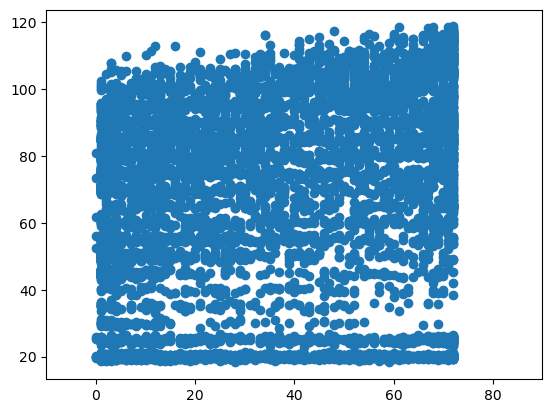

In [47]:
plt.scatter(telco_df.tenure, telco_df.monthly_charges)
plt.xlim(-10,90)
plt.show()

In [48]:
alpha = 0.05

### Does tenure correlate with monthly charges?

- $H_0$: Tenure does not have a linear correlation with monthly charges
- $H_a$: Tenure has a linear correlation with monthly charges

In [49]:
stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [50]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

In [51]:
r

0.24789985628615246

In [52]:
p

4.094044991476844e-99

In [53]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### Tenure has a linear correlation with monthly charges

### Total charges?

- $H_0$: Tenure does not have a linear correlation with total charges
- $H_a$: Tenure has a linear correlation with total charges

In [54]:
telco_df.total_charges.sort_values()

2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [55]:
telco_df['total_charges'] = telco_df['total_charges'].str.replace(' ','').str.replace(',','')

In [56]:
telco_df['total_charges'] = pd.to_numeric(telco_df['total_charges'], errors='coerce')

In [57]:
telco_df.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

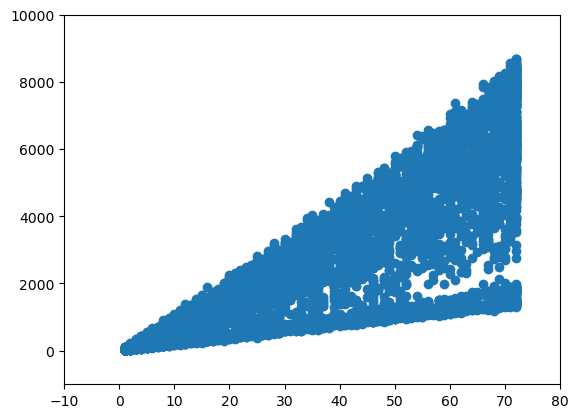

In [58]:
plt.scatter(telco_df.tenure, telco_df.total_charges)
plt.ylim(-1000,10_000)
plt.xlim(-10,80)
plt.show()

In [59]:
np.isnan(telco_df.total_charges).any()

True

In [60]:
np.isinf(telco_df.total_charges).any()

False

In [61]:
np.nan_to_num(telco_df.total_charges)

array([ 593.3 ,  542.4 ,  280.85, ...,   92.75, 4627.65, 3707.6 ])

In [62]:
telco_df['total_charges'] = np.nan_to_num(telco_df.total_charges)

In [63]:
telco_df['total_charges']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [64]:
stats.pearsonr(telco_df.tenure, telco_df.total_charges)

PearsonRResult(statistic=0.8261783979502481, pvalue=0.0)

In [65]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.total_charges)

In [66]:
r

0.8261783979502481

In [67]:
p

0.0

In [68]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### Tenure has a linear correlation with total charges

### What happens if you control for phone and internet service?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

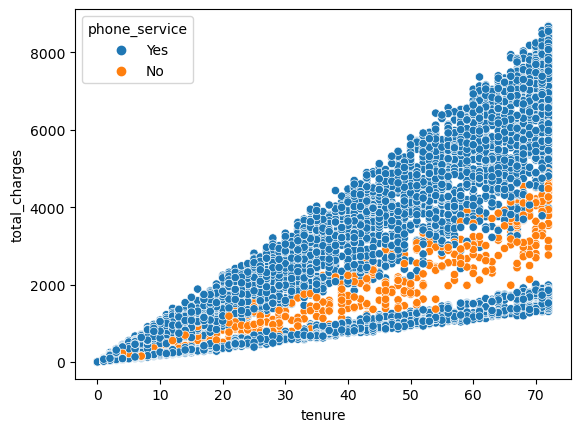

In [69]:
sns.scatterplot(data=telco_df, x='tenure', y='total_charges', hue='phone_service')
plt.show()

In [70]:
phonies = telco_df[telco_df.phone_service == 'Yes']
phonies.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [71]:
r, p = stats.pearsonr(phonies.tenure, phonies.total_charges)

In [72]:
r

0.8301076972900466

In [73]:
p

0.0

In [74]:
no_phonies = telco_df[telco_df.phone_service == 'No']
no_phonies.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
10,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,Yes,Yes,No,3,No,4,45.20,2460.55,No
14,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,Yes,Yes,No,No,3,No,3,45.05,2560.10,No
16,0020-JDNXP,Female,0,Yes,Yes,34,No,No phone service,1,Yes,...,Yes,Yes,Yes,Yes,2,No,2,61.25,1993.20,No
19,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,No,No,No,1,Yes,1,25.10,25.10,Yes
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,No,No,No,1,No,3,30.50,30.50,Yes


In [75]:
r, p = stats.pearsonr(no_phonies.tenure, no_phonies.total_charges)

In [76]:
r

0.9535697728407466

In [77]:
p

0.0

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


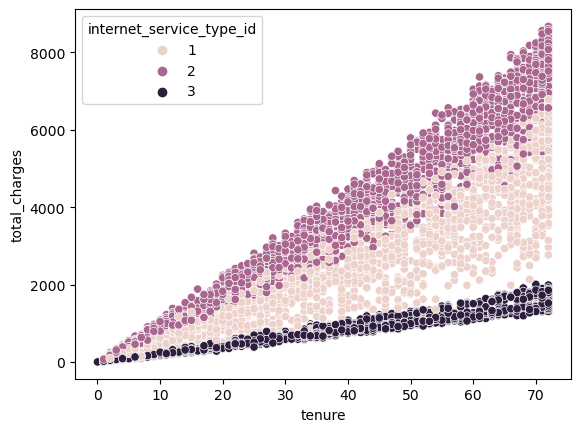

In [78]:
sns.scatterplot(data=telco_df, x='tenure', y='total_charges', hue='internet_service_type_id')
plt.show()

In [79]:
istype1 = telco_df[telco_df.internet_service_type_id == 1]
istype1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.90,No


In [80]:
istype2 = telco_df[telco_df.internet_service_type_id == 2]
istype2.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.80,No


In [81]:
istype3 = telco_df[telco_df.internet_service_type_id == 3]
istype3.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
20,0023-UYUPN,Female,1,Yes,No,50,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,1,25.20,1306.30,No
23,0030-FNXPP,Female,0,No,No,3,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,19.85,57.20,No
24,0031-PVLZI,Female,0,Yes,Yes,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,20.35,76.35,Yes
27,0040-HALCW,Male,0,Yes,Yes,54,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,4,20.40,1090.60,No
28,0042-JVWOJ,Male,0,No,No,26,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,Yes,3,19.60,471.85,No


In [82]:
stats.pearsonr(istype1.tenure, istype1.total_charges)

PearsonRResult(statistic=0.9413276892816262, pvalue=0.0)

In [83]:
r, p = stats.pearsonr(istype1.tenure, istype1.total_charges)

In [84]:
r

0.9413276892816262

In [85]:
p

0.0

In [86]:
stats.pearsonr(istype2.tenure, istype2.total_charges)

PearsonRResult(statistic=0.9853093528070621, pvalue=0.0)

In [87]:
r, p = stats.pearsonr(istype2.tenure, istype2.total_charges)

In [88]:
r

0.9853093528070621

In [89]:
p

0.0

In [90]:
stats.pearsonr(istype3.tenure, istype3.total_charges)

PearsonRResult(statistic=0.9815669784401064, pvalue=0.0)

In [91]:
r, p = stats.pearsonr(istype3.tenure, istype3.total_charges)

In [92]:
r

0.9815669784401064

In [93]:
p

0.0

## Use the employees database.

#### Is there a relationship between how long an employee has been with the company and their salary?

In [94]:
from env import host, user, password

In [95]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [99]:
query = '''select * from employees
join salaries
using (emp_no);
'''

In [100]:
df = pd.read_sql(query, url)
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29


#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?